<a href="https://colab.research.google.com/github/ArunK-ML/Learn---Unsupervised-Learning--Kmean-TheElbowMethod-WCSS-Silhouette_Score-DB_index/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/Quote-Equity-TCS-EQ-06-08-2024-to-06-08-2025.csv")
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,06-Aug-2025,EQ,"3,063.00","3,066.80","3,026.00","3,063.90","3,031.60","3,032.30","3,037.10","4,592.25","2,991.60","14,87,081","4,51,64,12,670.50","1,09,992"
1,05-Aug-2025,EQ,"3,074.40","3,077.50","3,042.00","3,074.40","3,060.00","3,063.90","3,057.96","4,592.25","2,991.60","19,27,996","5,89,57,39,286.30","1,18,848"
2,04-Aug-2025,EQ,"3,009.10","3,079.40","2,991.60","3,003.00","3,078.70","3,074.40","3,046.24","4,592.25","2,991.60","25,19,252","7,67,42,44,863.50","1,54,005"
3,01-Aug-2025,EQ,"3,029.90","3,036.80","3,000.00","3,036.80","3,001.10","3,003.00","3,013.79","4,592.25","3,000.00","20,53,847","6,18,98,63,144.50","1,54,119"
4,31-Jul-2025,EQ,"3,041.70","3,059.80","3,015.00","3,053.60","3,033.20","3,036.80","3,034.36","4,592.25","3,015.00","29,68,371","9,00,71,05,954.30","1,99,367"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,12-Aug-2024,EQ,"4,230.00","4,239.00","4,186.35","4,228.75","4,193.10","4,195.65","4,210.62","4,431.00","3,311.00","9,36,912","3,94,49,78,151.60","86,028"
247,09-Aug-2024,EQ,"4,217.00","4,253.65","4,205.55","4,172.55","4,220.00","4,228.75","4,233.82","4,431.00","3,311.00","13,02,536","5,51,47,05,150.35","79,876"
248,08-Aug-2024,EQ,"4,181.00","4,232.00","4,160.00","4,200.45","4,174.00","4,172.55","4,190.47","4,431.00","3,311.00","24,41,283","10,23,01,19,942.80","1,20,490"
249,07-Aug-2024,EQ,"4,228.00","4,244.95","4,180.30","4,171.20","4,201.00","4,200.45","4,201.58","4,431.00","3,311.00","12,37,666","5,20,01,50,778.85","1,02,627"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           251 non-null    object
 1   series         251 non-null    object
 2   OPEN           251 non-null    object
 3   HIGH           251 non-null    object
 4   LOW            251 non-null    object
 5   PREV. CLOSE    251 non-null    object
 6   ltp            251 non-null    object
 7   close          251 non-null    object
 8   vwap           251 non-null    object
 9   52W H          251 non-null    object
 10  52W L          251 non-null    object
 11  VOLUME         251 non-null    object
 12  VALUE          251 non-null    object
 13  No of trades   251 non-null    object
dtypes: object(14)
memory usage: 27.6+ KB


In [3]:
df['Date '] = pd.to_datetime(df['Date '],format="%d-%b-%Y")

In [4]:
df.drop('series ',axis = 1,inplace = True)

In [5]:
for i in df.select_dtypes(include = "object").columns:
  df[i]=df[i].str.replace(",","").astype(float)
df

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,2025-08-06,3063.00,3066.80,3026.00,3063.90,3031.6,3032.30,3037.10,4592.25,2991.6,1487081.0,4.516413e+09,109992.0
1,2025-08-05,3074.40,3077.50,3042.00,3074.40,3060.0,3063.90,3057.96,4592.25,2991.6,1927996.0,5.895739e+09,118848.0
2,2025-08-04,3009.10,3079.40,2991.60,3003.00,3078.7,3074.40,3046.24,4592.25,2991.6,2519252.0,7.674245e+09,154005.0
3,2025-08-01,3029.90,3036.80,3000.00,3036.80,3001.1,3003.00,3013.79,4592.25,3000.0,2053847.0,6.189863e+09,154119.0
4,2025-07-31,3041.70,3059.80,3015.00,3053.60,3033.2,3036.80,3034.36,4592.25,3015.0,2968371.0,9.007106e+09,199367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2024-08-12,4230.00,4239.00,4186.35,4228.75,4193.1,4195.65,4210.62,4431.00,3311.0,936912.0,3.944978e+09,86028.0
247,2024-08-09,4217.00,4253.65,4205.55,4172.55,4220.0,4228.75,4233.82,4431.00,3311.0,1302536.0,5.514705e+09,79876.0
248,2024-08-08,4181.00,4232.00,4160.00,4200.45,4174.0,4172.55,4190.47,4431.00,3311.0,2441283.0,1.023012e+10,120490.0
249,2024-08-07,4228.00,4244.95,4180.30,4171.20,4201.0,4200.45,4201.58,4431.00,3311.0,1237666.0,5.200151e+09,102627.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           251 non-null    datetime64[ns]
 1   OPEN           251 non-null    float64       
 2   HIGH           251 non-null    float64       
 3   LOW            251 non-null    float64       
 4   PREV. CLOSE    251 non-null    float64       
 5   ltp            251 non-null    float64       
 6   close          251 non-null    float64       
 7   vwap           251 non-null    float64       
 8   52W H          251 non-null    float64       
 9   52W L          251 non-null    float64       
 10  VOLUME         251 non-null    float64       
 11  VALUE          251 non-null    float64       
 12  No of trades   251 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 25.6 KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Year'] = df['Date '].dt.year
df['Month'] = df['Date '].dt.month
df['Day'] = df['Date '].dt.day
df['Day_of_Week'] = df['Date '].dt.day_of_week
df

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Year,Month,Day,Day_of_Week
0,2025-08-06,3063.00,3066.80,3026.00,3063.90,3031.6,3032.30,3037.10,4592.25,2991.6,1487081.0,4.516413e+09,109992.0,2025,8,6,2
1,2025-08-05,3074.40,3077.50,3042.00,3074.40,3060.0,3063.90,3057.96,4592.25,2991.6,1927996.0,5.895739e+09,118848.0,2025,8,5,1
2,2025-08-04,3009.10,3079.40,2991.60,3003.00,3078.7,3074.40,3046.24,4592.25,2991.6,2519252.0,7.674245e+09,154005.0,2025,8,4,0
3,2025-08-01,3029.90,3036.80,3000.00,3036.80,3001.1,3003.00,3013.79,4592.25,3000.0,2053847.0,6.189863e+09,154119.0,2025,8,1,4
4,2025-07-31,3041.70,3059.80,3015.00,3053.60,3033.2,3036.80,3034.36,4592.25,3015.0,2968371.0,9.007106e+09,199367.0,2025,7,31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2024-08-12,4230.00,4239.00,4186.35,4228.75,4193.1,4195.65,4210.62,4431.00,3311.0,936912.0,3.944978e+09,86028.0,2024,8,12,0
247,2024-08-09,4217.00,4253.65,4205.55,4172.55,4220.0,4228.75,4233.82,4431.00,3311.0,1302536.0,5.514705e+09,79876.0,2024,8,9,4
248,2024-08-08,4181.00,4232.00,4160.00,4200.45,4174.0,4172.55,4190.47,4431.00,3311.0,2441283.0,1.023012e+10,120490.0,2024,8,8,3
249,2024-08-07,4228.00,4244.95,4180.30,4171.20,4201.0,4200.45,4201.58,4431.00,3311.0,1237666.0,5.200151e+09,102627.0,2024,8,7,2


In [9]:
# changing the date column into index
df.set_index('Date ',inplace = True)

In [10]:
df

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Year,Month,Day,Day_of_Week
Date,,,,,,,,,,,,,,,,
2025-08-06,3063.00,3066.80,3026.00,3063.90,3031.6,3032.30,3037.10,4592.25,2991.6,1487081.0,4.516413e+09,109992.0,2025,8,6,2
2025-08-05,3074.40,3077.50,3042.00,3074.40,3060.0,3063.90,3057.96,4592.25,2991.6,1927996.0,5.895739e+09,118848.0,2025,8,5,1
2025-08-04,3009.10,3079.40,2991.60,3003.00,3078.7,3074.40,3046.24,4592.25,2991.6,2519252.0,7.674245e+09,154005.0,2025,8,4,0
2025-08-01,3029.90,3036.80,3000.00,3036.80,3001.1,3003.00,3013.79,4592.25,3000.0,2053847.0,6.189863e+09,154119.0,2025,8,1,4
2025-07-31,3041.70,3059.80,3015.00,3053.60,3033.2,3036.80,3034.36,4592.25,3015.0,2968371.0,9.007106e+09,199367.0,2025,7,31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,4230.00,4239.00,4186.35,4228.75,4193.1,4195.65,4210.62,4431.00,3311.0,936912.0,3.944978e+09,86028.0,2024,8,12,0
2024-08-09,4217.00,4253.65,4205.55,4172.55,4220.0,4228.75,4233.82,4431.00,3311.0,1302536.0,5.514705e+09,79876.0,2024,8,9,4
2024-08-08,4181.00,4232.00,4160.00,4200.45,4174.0,4172.55,4190.47,4431.00,3311.0,2441283.0,1.023012e+10,120490.0,2024,8,8,3


In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4).fit(df)

In [12]:
group = model.predict(df)
group

array([1, 1, 1, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 3, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 3, 2, 3, 3, 1, 0,
       1, 0, 1, 0, 1, 3, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 3, 2, 3, 3,
       0, 1, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 3, 3, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 3, 3, 1, 3, 1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 1, 0, 0, 1, 0, 3,
       3, 0, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 0, 1, 3, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 3, 3, 1, 0, 3, 3, 0, 3, 1, 2, 3,
       3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 3, 3, 1, 1, 1, 0, 1, 0], dtype=int32)

In [13]:
df["group"]= group

In [14]:
df

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Year,Month,Day,Day_of_Week,group
Date,,,,,,,,,,,,,,,,,
2025-08-06,3063.00,3066.80,3026.00,3063.90,3031.6,3032.30,3037.10,4592.25,2991.6,1487081.0,4.516413e+09,109992.0,2025,8,6,2,1
2025-08-05,3074.40,3077.50,3042.00,3074.40,3060.0,3063.90,3057.96,4592.25,2991.6,1927996.0,5.895739e+09,118848.0,2025,8,5,1,1
2025-08-04,3009.10,3079.40,2991.60,3003.00,3078.7,3074.40,3046.24,4592.25,2991.6,2519252.0,7.674245e+09,154005.0,2025,8,4,0,1
2025-08-01,3029.90,3036.80,3000.00,3036.80,3001.1,3003.00,3013.79,4592.25,3000.0,2053847.0,6.189863e+09,154119.0,2025,8,1,4,1
2025-07-31,3041.70,3059.80,3015.00,3053.60,3033.2,3036.80,3034.36,4592.25,3015.0,2968371.0,9.007106e+09,199367.0,2025,7,31,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,4230.00,4239.00,4186.35,4228.75,4193.1,4195.65,4210.62,4431.00,3311.0,936912.0,3.944978e+09,86028.0,2024,8,12,0,1
2024-08-09,4217.00,4253.65,4205.55,4172.55,4220.0,4228.75,4233.82,4431.00,3311.0,1302536.0,5.514705e+09,79876.0,2024,8,9,4,1
2024-08-08,4181.00,4232.00,4160.00,4200.45,4174.0,4172.55,4190.47,4431.00,3311.0,2441283.0,1.023012e+10,120490.0,2024,8,8,3,0


In [15]:
df["group"].value_counts()

,count
group,
1,105
0,103
3,36
2,7


In [16]:
pd.set_option("display.max_rows",None)

In [17]:
df

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Year,Month,Day,Day_of_Week,group
Date,,,,,,,,,,,,,,,,,
2025-08-06,3063.00,3066.80,3026.00,3063.90,3031.60,3032.30,3037.10,4592.25,2991.60,1487081.0,4.516413e+09,109992.0,2025,8,6,2,1
2025-08-05,3074.40,3077.50,3042.00,3074.40,3060.00,3063.90,3057.96,4592.25,2991.60,1927996.0,5.895739e+09,118848.0,2025,8,5,1,1
2025-08-04,3009.10,3079.40,2991.60,3003.00,3078.70,3074.40,3046.24,4592.25,2991.60,2519252.0,7.674245e+09,154005.0,2025,8,4,0,1
2025-08-01,3029.90,3036.80,3000.00,3036.80,3001.10,3003.00,3013.79,4592.25,3000.00,2053847.0,6.189863e+09,154119.0,2025,8,1,4,1
2025-07-31,3041.70,3059.80,3015.00,3053.60,3033.20,3036.80,3034.36,4592.25,3015.00,2968371.0,9.007106e+09,199367.0,2025,7,31,3,0
2025-07-30,3060.00,3069.00,3047.20,3056.00,3052.10,3053.60,3058.58,4592.25,3041.20,2880121.0,8.809079e+09,127490.0,2025,7,30,2,0
2025-07-29,3060.00,3074.00,3041.20,3079.30,3057.00,3056.00,3056.04,4592.25,3041.20,4785312.0,1.462409e+10,247039.0,2025,7,29,1,3
2025-07-28,3110.00,3118.00,3069.90,3135.80,3085.80,3079.30,3092.56,4592.25,3056.05,3374473.0,1.043575e+10,273133.0,2025,7,28,0,0
2025-07-25,3140.00,3156.90,3125.60,3148.00,3140.00,3135.80,3140.77,4592.25,3056.05,2568917.0,8.068376e+09,105704.0,2025,7,25,4,0


In [18]:
df.shape

(251, 17)

In [19]:
practice = []
for i in range(1,252):
  model = KMeans(n_clusters = i).fit(df.iloc[:,:-1])
  practice.append(model.inertia_)

In [22]:
import plotly.express as px
fig = px.line(x = range(1,252),y = practice)
fig.update_layout(xaxis_title='Number of Clusters (K)', yaxis_title='WCSS (Within-Cluster Sum of Squares)')
fig.show()

In [ ]:
# Silhouette Score
# DB Index

# **Silhouette Score**

**Silhouette Score**

The **Silhouette Score** measures **how similar a data point is to its own cluster** (cohesion) **compared to other clusters** (separation).

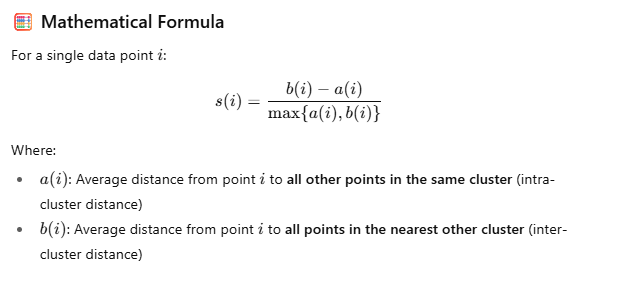

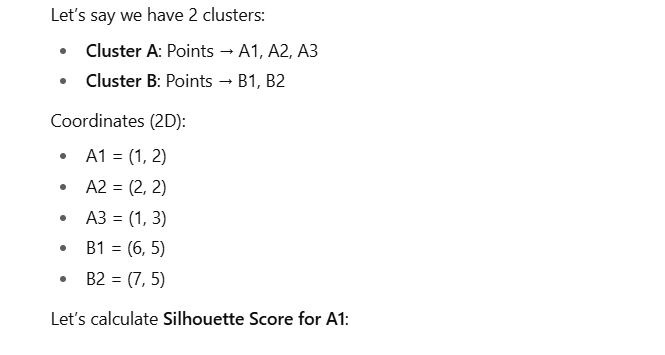

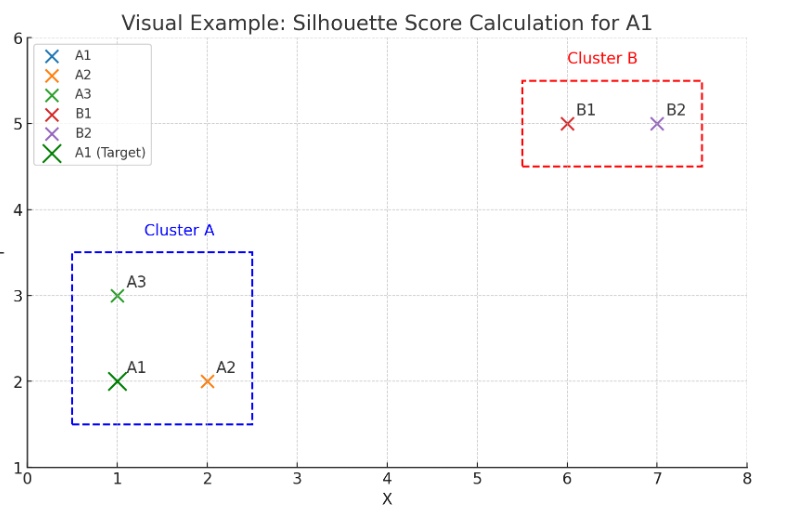

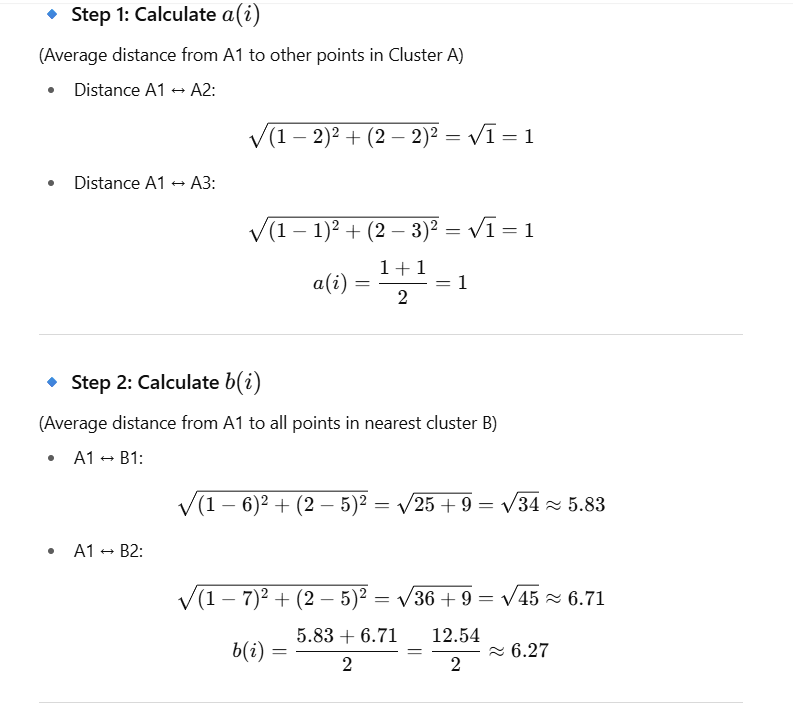

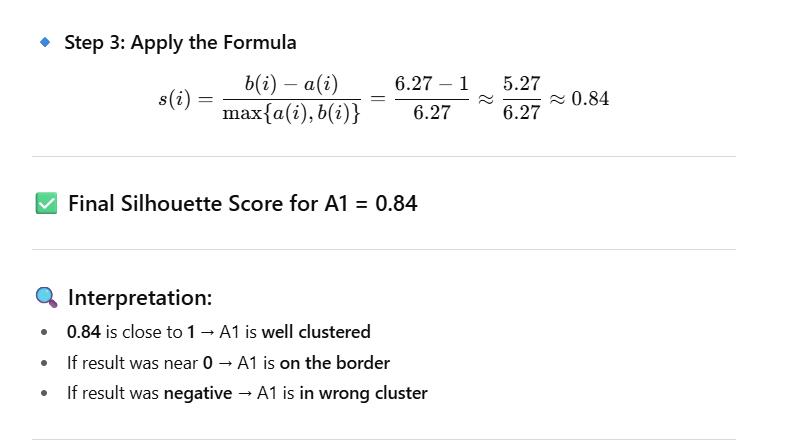

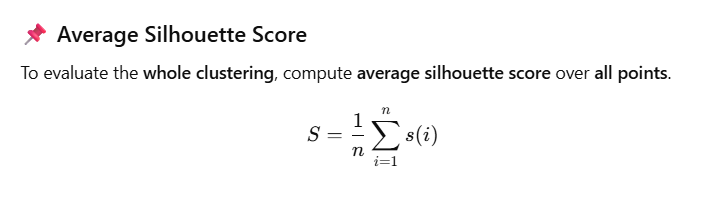

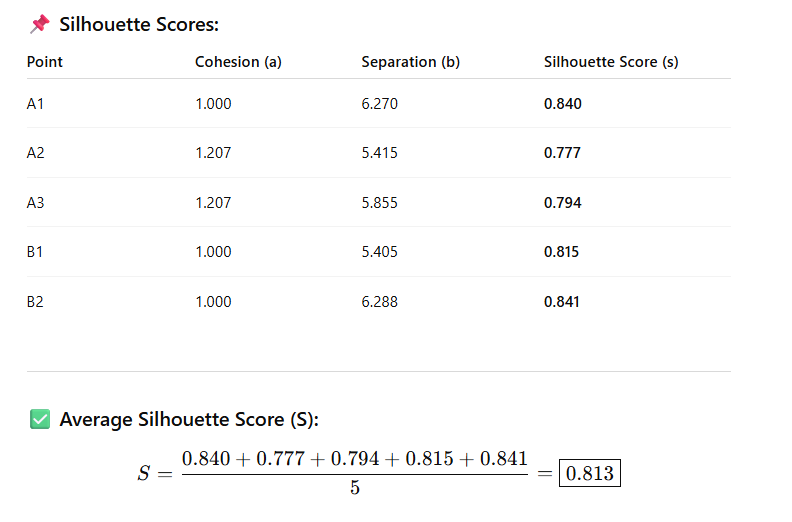